In [1]:
%reset
%load_ext autoreload
%autoreload 2
%matplotlib notebook
%matplotlib notebook
import topOptSigmund
import topOptHarmonic
import matplotlib.pyplot as plt
import numpy as np
import mesh2D
import copy

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [ ]:
## STATIC OPTIMIZATION
nelx = 300
nely = 200
volFrac = 0.5
penal = 3
rmin = 0.04*nelx
#rmin = 1.5

maxiter = 5

x = topOptSigmund.topo2D(nelx,nely,volFrac,penal,rmin,maxiter)

# plot densities
plt.figure(2)
plt.clf()
plt.imshow(np.reshape(x,(nely,nelx),order = 'F'))
plt.show()
plt.axis('equal')

In [18]:
## DYNAMIC OPTIMIZATION, POWER METHOD

# mesh size
nely = 48
nelx = 3*nely

# output default properties for setting up the cantilever example
Lx, Ly, volFrac, freeDOFs, fixedDOFs, Mlump, ilump, xCon = topOptHarmonic.example2DCantilever(nelx, nely)

# run optimization of the cantilever example
x2, info2 = topOptHarmonic.topo2D(nelx, nely, Lx, volFrac, 
                                  freeDOFs, fixedDOFs, Mlump, ilump,
                                  xConstraint = xCon, 
                                  optimizer = 'OC',
                                  maxiter = 100,
                                  costFunc = 'power',
                                  power = 10)


Model size:  14210  DOFs
It.:   1,    Obj.: 1.889e-04,   Vol.:0.3000, Ch.:0.0500,   Tloop:0.4068
It.:   2,    Obj.: 3.120e-04,   Vol.:0.3000, Ch.:0.0500,   Tloop:0.4491
It.:   3,    Obj.: 4.514e-04,   Vol.:0.3000, Ch.:0.0500,   Tloop:0.4662
It.:   4,    Obj.: 5.896e-04,   Vol.:0.3000, Ch.:0.0500,   Tloop:0.6967
It.:   5,    Obj.: 7.303e-04,   Vol.:0.3000, Ch.:0.0500,   Tloop:0.5613
It.:   6,    Obj.: 9.037e-04,   Vol.:0.3000, Ch.:0.0500,   Tloop:0.4224
It.:   7,    Obj.: 1.123e-03,   Vol.:0.3000, Ch.:0.0500,   Tloop:0.5021
It.:   8,    Obj.: 1.268e-03,   Vol.:0.3000, Ch.:0.0500,   Tloop:0.4570
It.:   9,    Obj.: 1.431e-03,   Vol.:0.3000, Ch.:0.0500,   Tloop:0.4513
It.:  10,    Obj.: 1.631e-03,   Vol.:0.3000, Ch.:0.0500,   Tloop:0.4859
It.:  11,    Obj.: 1.860e-03,   Vol.:0.3000, Ch.:0.0500,   Tloop:0.4812
It.:  12,    Obj.: 2.108e-03,   Vol.:0.3000, Ch.:0.0500,   Tloop:0.4849
It.:  13,    Obj.: 2.367e-03,   Vol.:0.3000, Ch.:0.0500,   Tloop:0.4736
It.:  14,    Obj.: 2.637e-03,   Vol.:0.

<IPython.core.display.Javascript object>


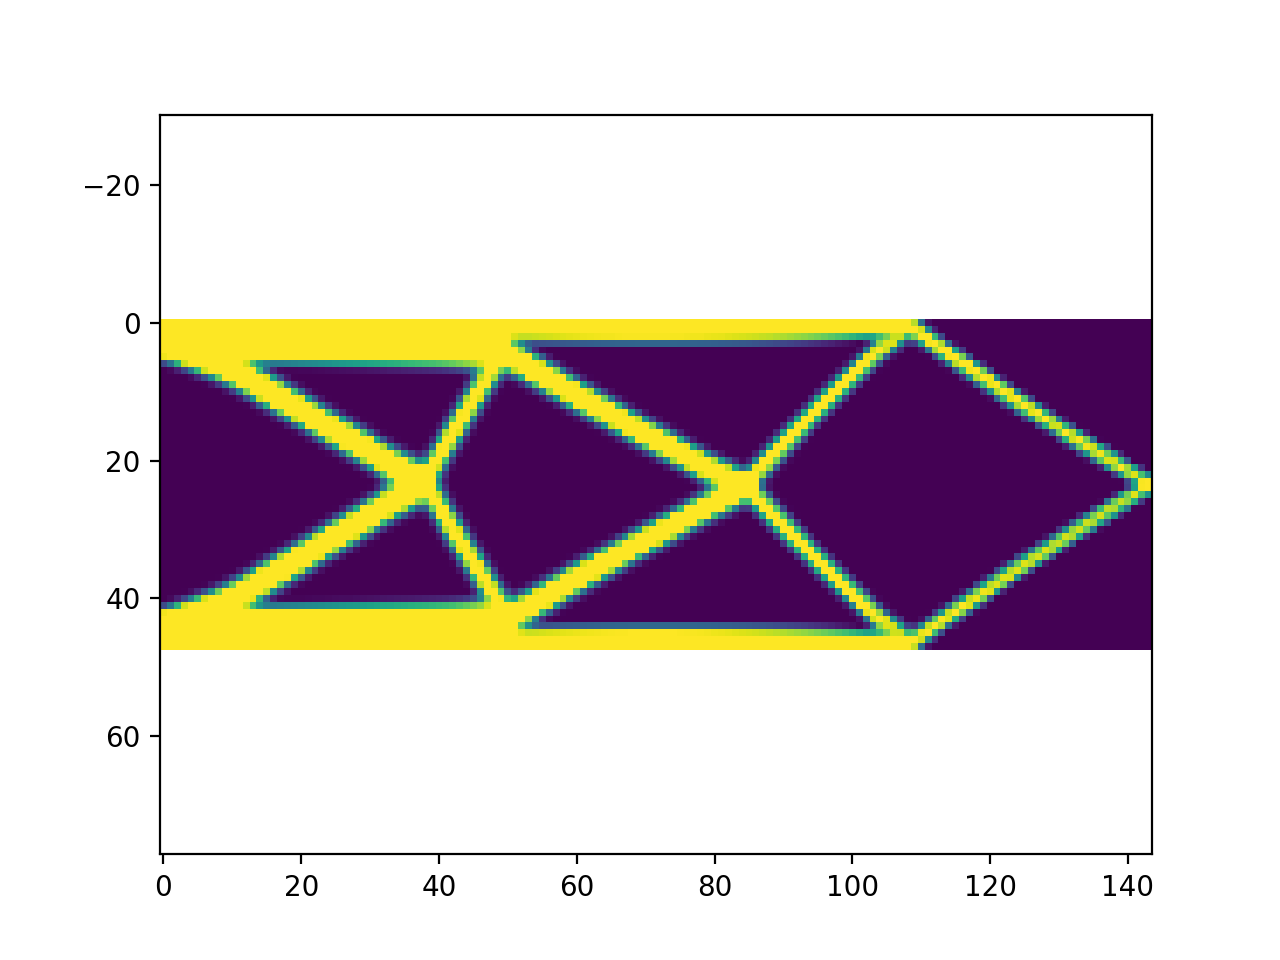

<IPython.core.display.Javascript object>


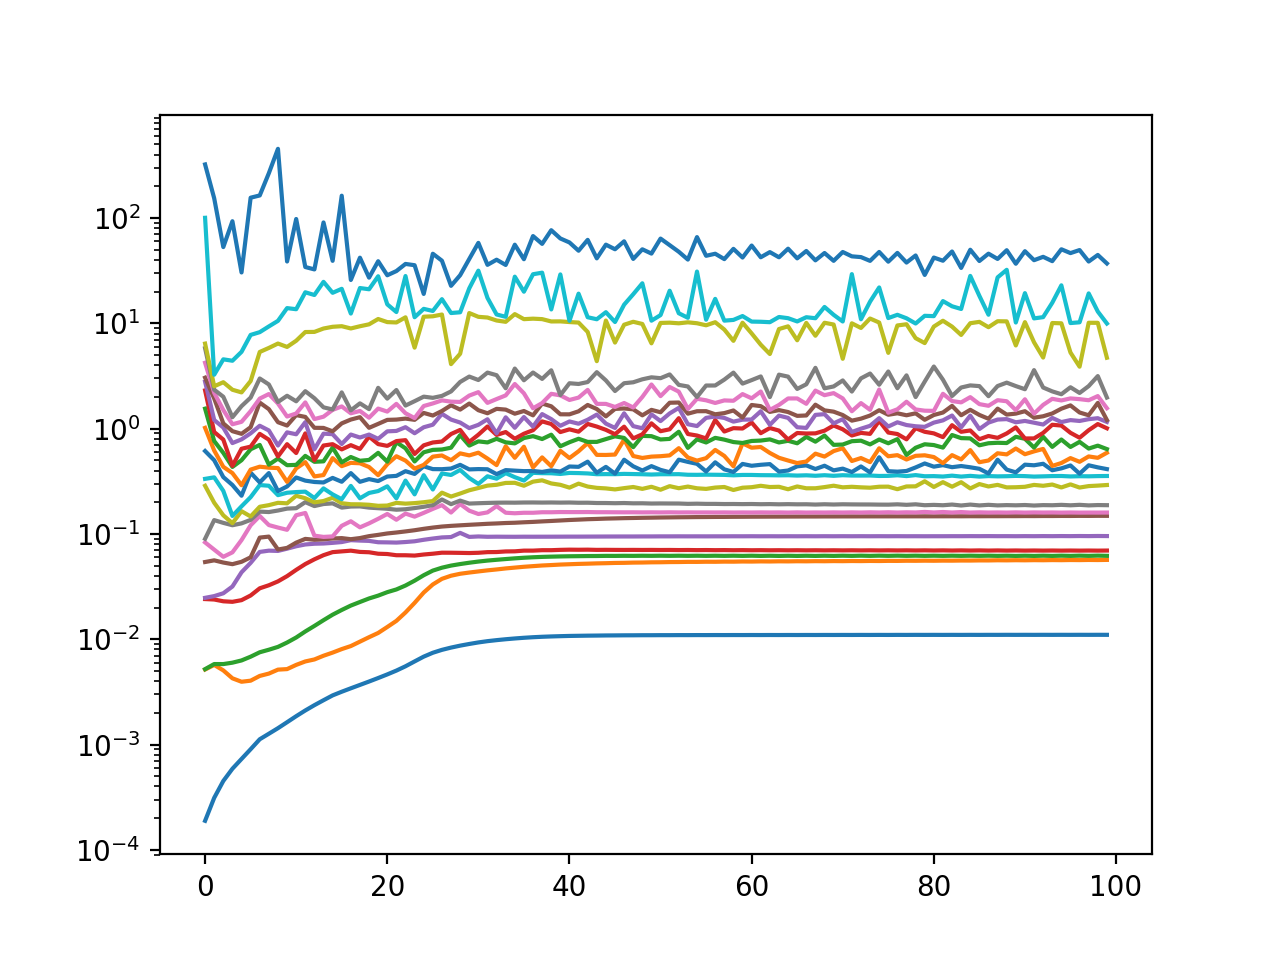

<IPython.core.display.Javascript object>


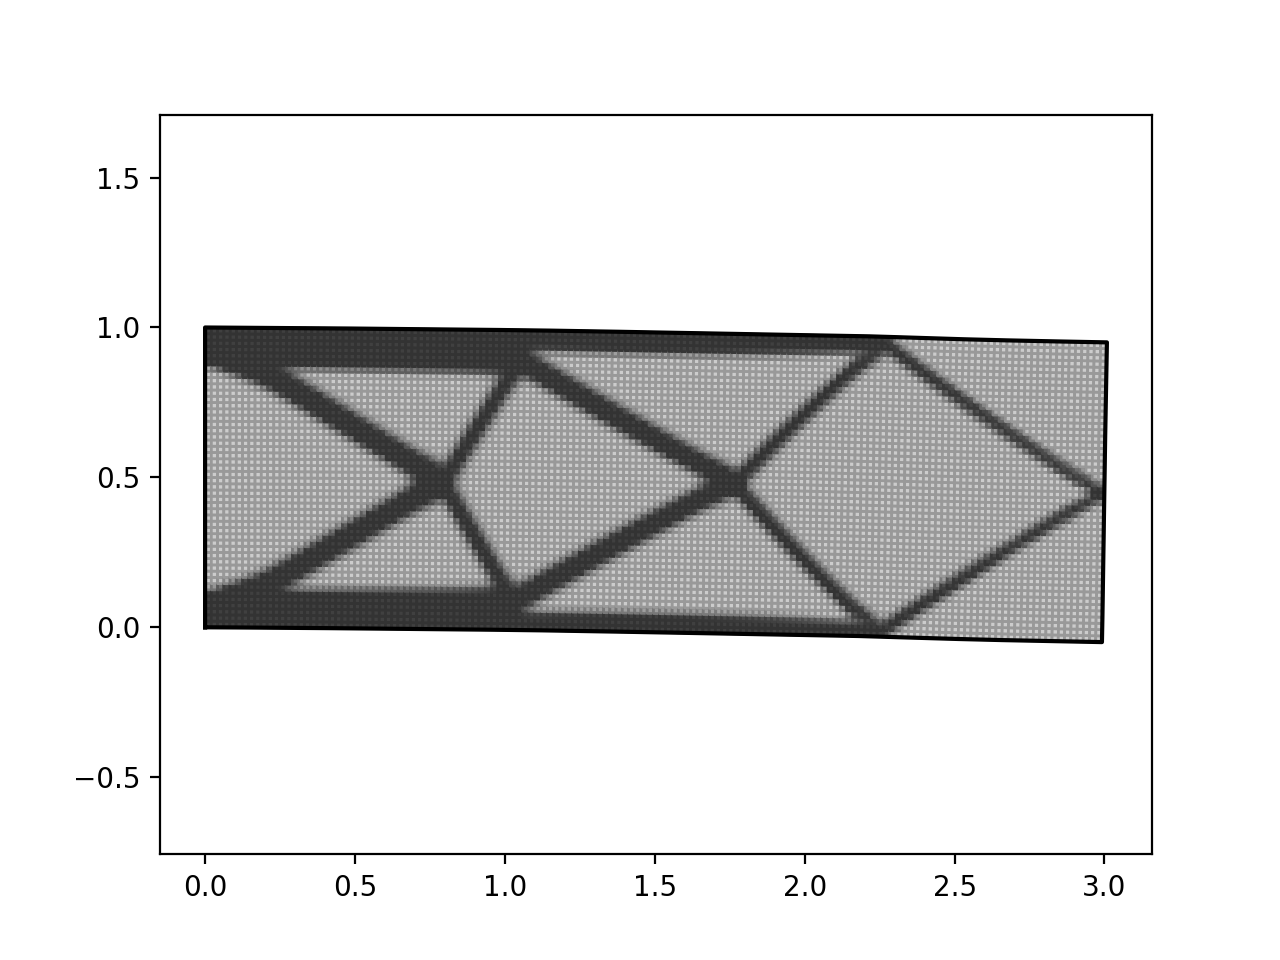

<IPython.core.display.Javascript object>


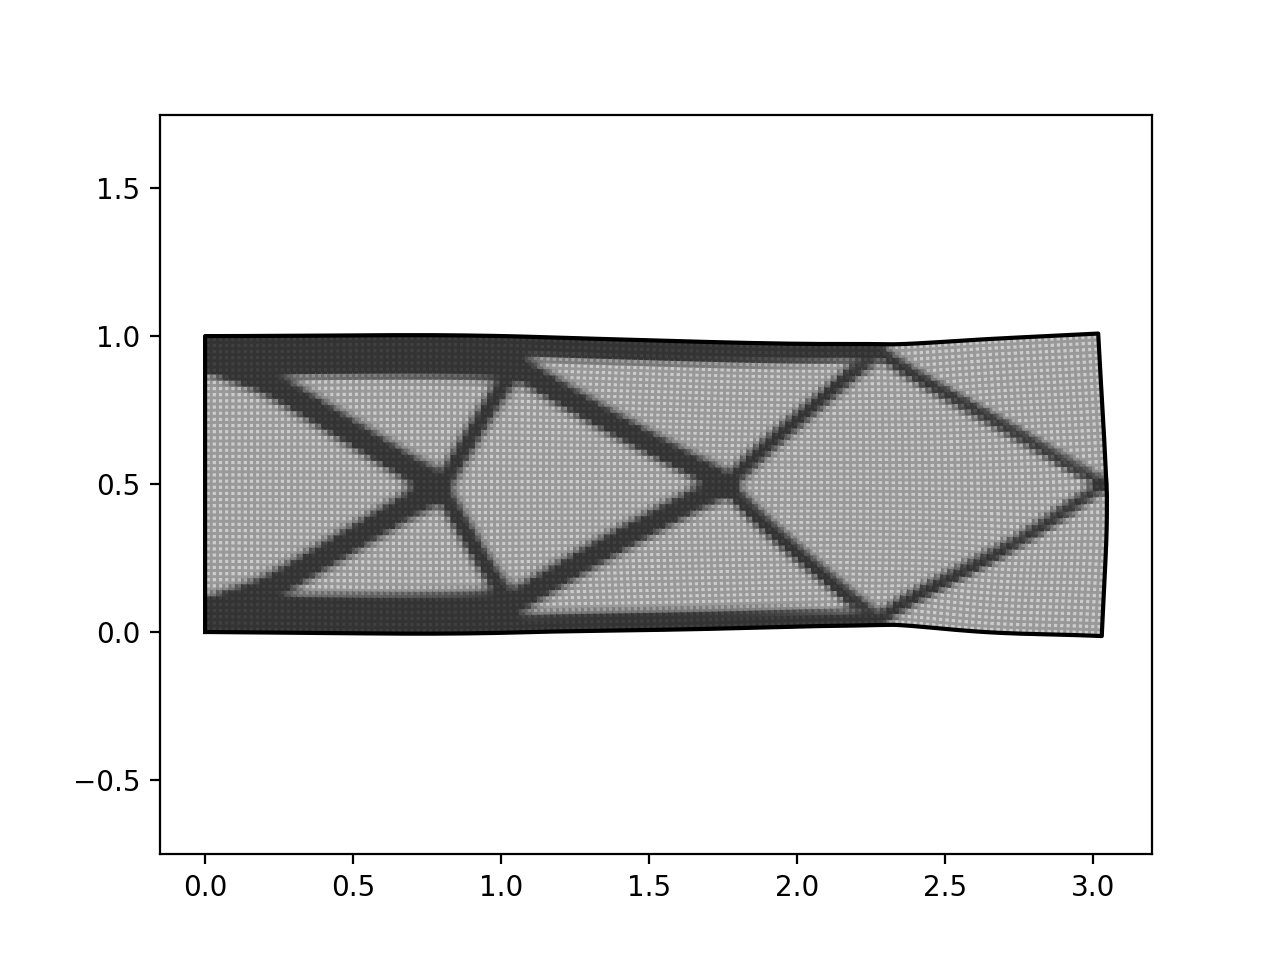

<IPython.core.display.Javascript object>


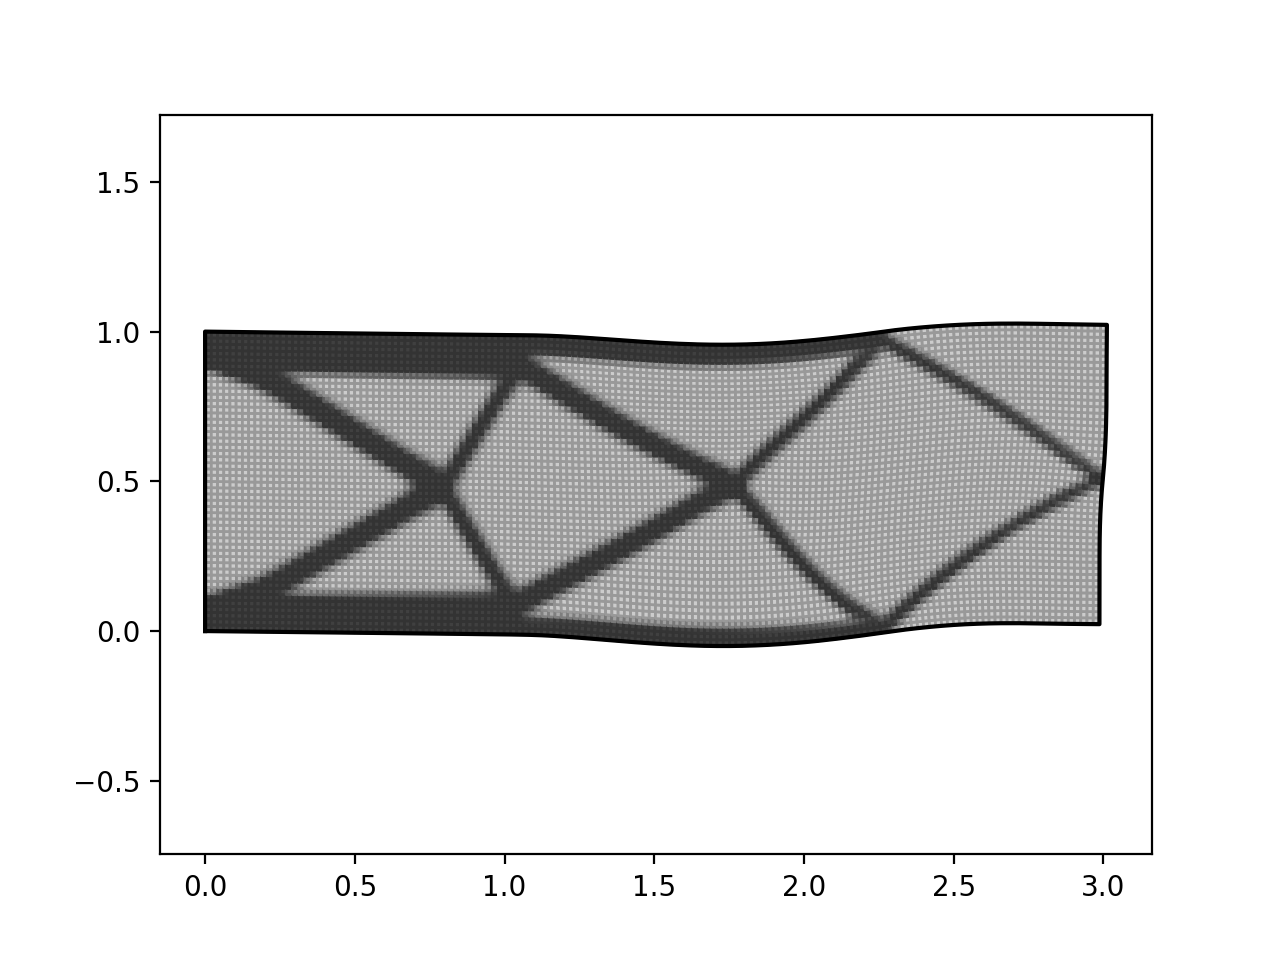

In [19]:
info = info2
x = x2
figureNumber = 10

eleOrder = 1
mesh = mesh2D.regularRectangle(nelx, nely, Lx, Ly, eleOrder)

# plot densities
plt.figure(figureNumber+5)
plt.clf()
plt.imshow(np.reshape(x, (nely, nelx), order = 'F'))
plt.show()
plt.axis('equal')

plt.figure(figureNumber+6)
plt.clf()
# plt.plot(np.asarray(info['lamlist']))
plt.semilogy(np.asarray(info['lamlist']))

# print((1.5)*info['lamlist'][-1][0])
# plt.ylim((0,(5*info['lamlist'][-1][0])))

Phis = info['Philist'][-1]
for i in range(np.minimum(np.shape(Phis)[1],3)):
    plt.figure(figureNumber+i)
    plt.clf()
    meshNew = copy.deepcopy(mesh)
    Phiplot = Phis[:,i]
    Phiplot = Phiplot/np.amax(np.abs(Phiplot))
    meshNew.updateCoordinates(meshNew.coordinates + 
        0.05*np.reshape(Phiplot,np.shape(meshNew.coordinates)))
    meshHandle = mesh2D.plotElements(meshNew,C=x)
    edgeHandle = mesh2D.plotEdges(meshNew)
    plt.show()

In [448]:
nelx = 80
nely = 80

Lx, Ly, volFrac, freeDOFs, fixedDOFs, Mlump, ilump, xCon = topOptHarmonic.example2DSymmetric(nelx, nely)


x1, info1 = topOptHarmonic.topo2D(nelx, nely, Lx, volFrac, 
                                  freeDOFs, fixedDOFs, Mlump, ilump,
                                  xConstraint = xCon, 
                                  optimizer = 'OC',
                                  maxiter = 100,
                                  costFunc = 'power',
                                  power = 20)

lumped mass node =  [3280]
Model size:  13122  DOFs
It.:   1,    Obj.: 5.515e-02 1.932e+48,   Vol.:0.2942, Ch.:0.0500,   Tloop:0.7725
It.:   2,    Obj.: 7.567e-02 2.659e+62,   Vol.:0.2967, Ch.:0.0500,   Tloop:0.7934
It.:   3,    Obj.: 1.005e-01 8.618e+50,   Vol.:0.3000, Ch.:0.0500,   Tloop:0.7411
It.:   4,    Obj.: 9.033e-02 1.595e+160,   Vol.:0.2500, Ch.:0.0500,   Tloop:0.8315
It.:   5,    Obj.: 5.982e-02 5.098e+66,   Vol.:0.2444, Ch.:0.0500,   Tloop:0.8441
It.:   6,    Obj.: 3.768e-02 4.633e+71,   Vol.:0.2373, Ch.:0.0500,   Tloop:0.8810
It.:   7,    Obj.: 2.619e-02 3.177e+84,   Vol.:0.2408, Ch.:0.0500,   Tloop:0.8876
It.:   8,    Obj.: 1.924e-02 3.623e+94,   Vol.:0.2579, Ch.:0.0500,   Tloop:0.8362
It.:   9,    Obj.: 1.326e-02 4.831e+95,   Vol.:0.2812, Ch.:0.0500,   Tloop:0.8644
It.:  10,    Obj.: 8.931e-03 7.975e+100,   Vol.:0.3000, Ch.:0.0500,   Tloop:0.7869
It.:  11,    Obj.: 6.749e-03 3.913e+115,   Vol.:0.3000, Ch.:0.0500,   Tloop:0.8023
It.:  12,    Obj.: 6.204e-03 3.172e+155,   

lowest frequencies:  [0.52838353 0.96593408 1.14779837]
lowest eigvals:  [0.27918916 0.93302865 1.3174411 ]
cost function time (s) 62.8472204208374
linear optimization time (s) 13.407273054122925
Total Computation time (s) 82.93107509613037


<IPython.core.display.Javascript object>


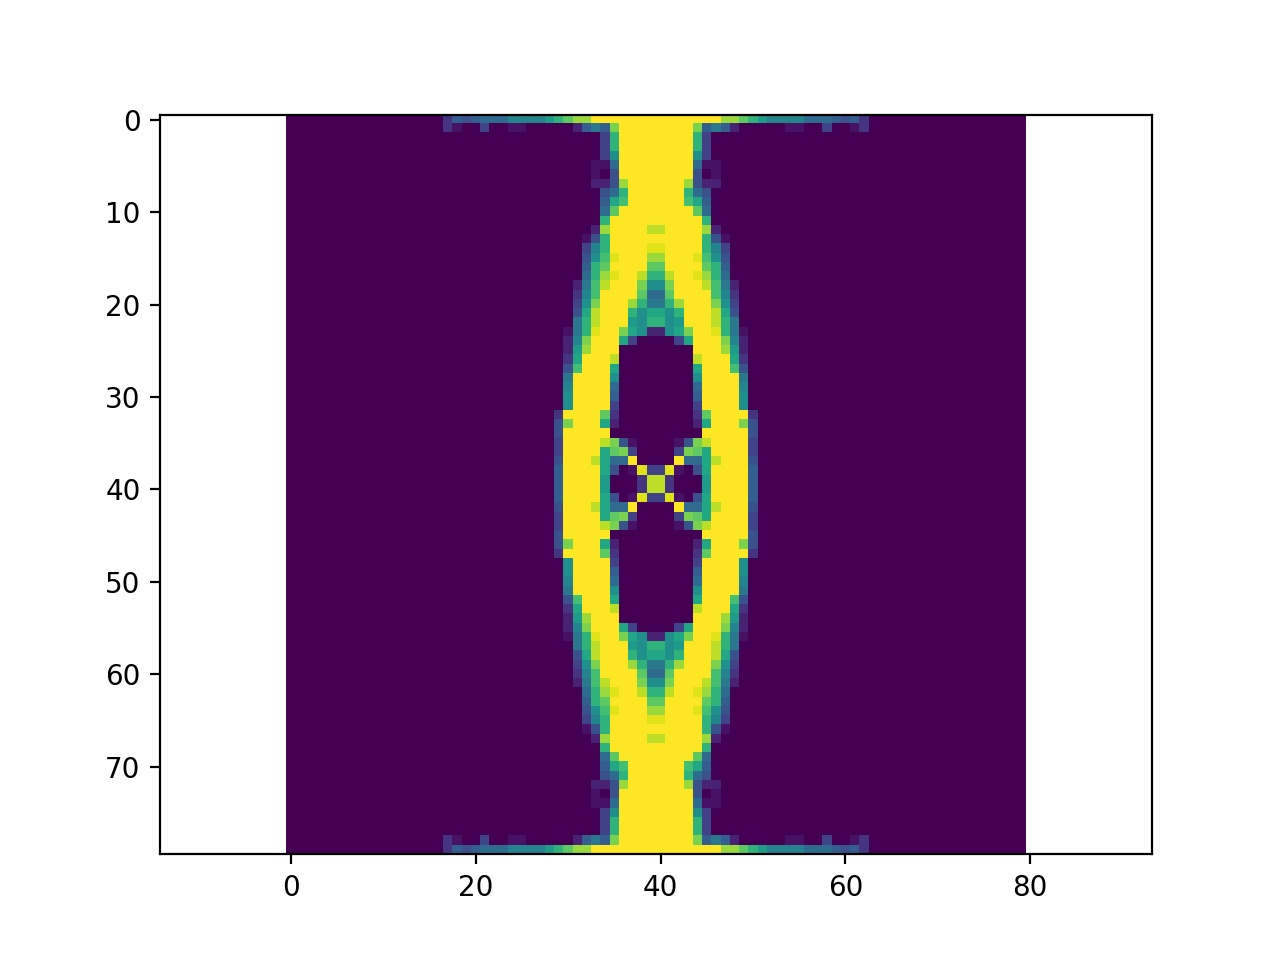

<IPython.core.display.Javascript object>


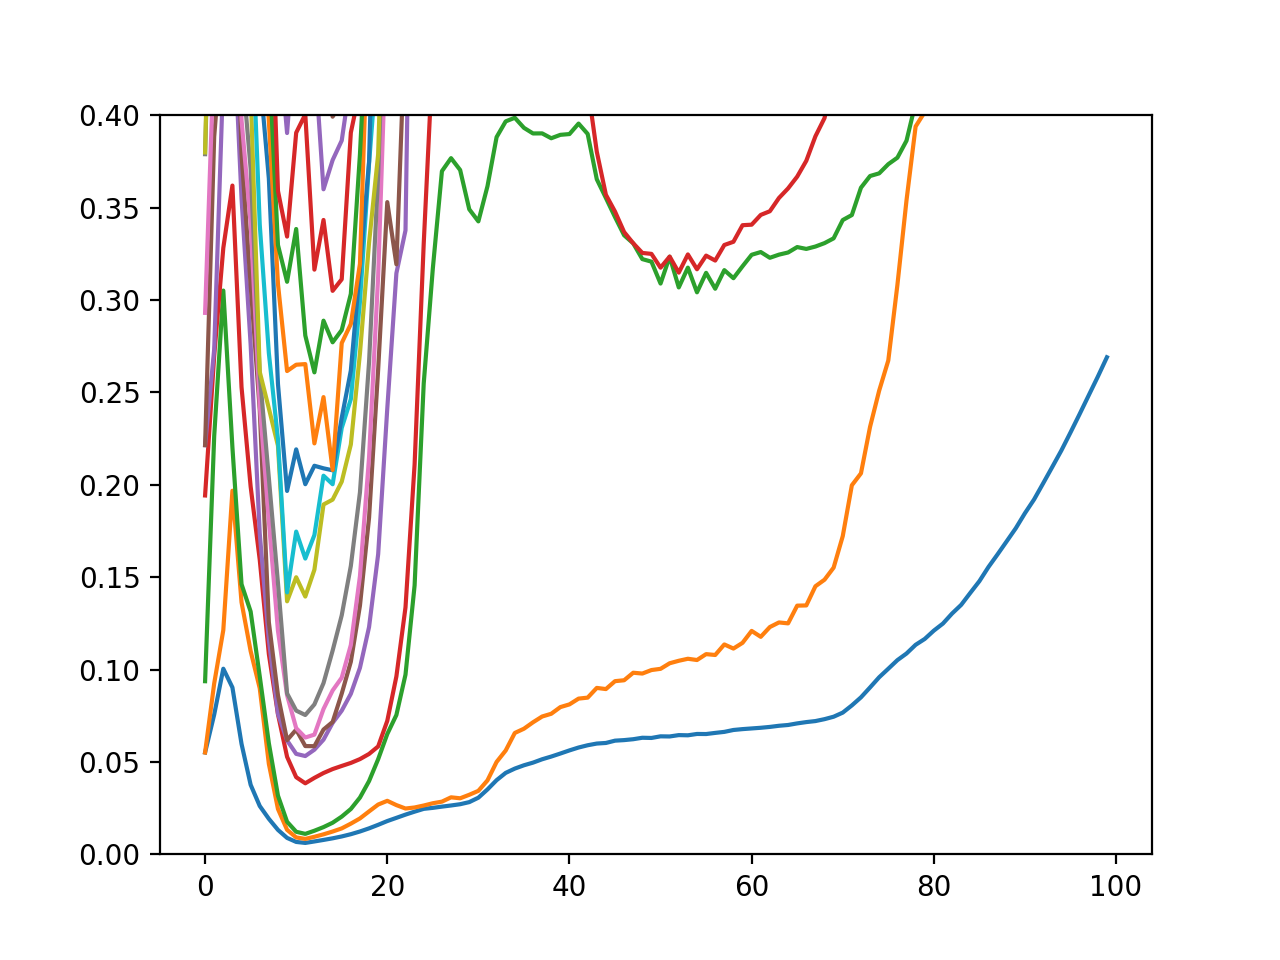

<IPython.core.display.Javascript object>


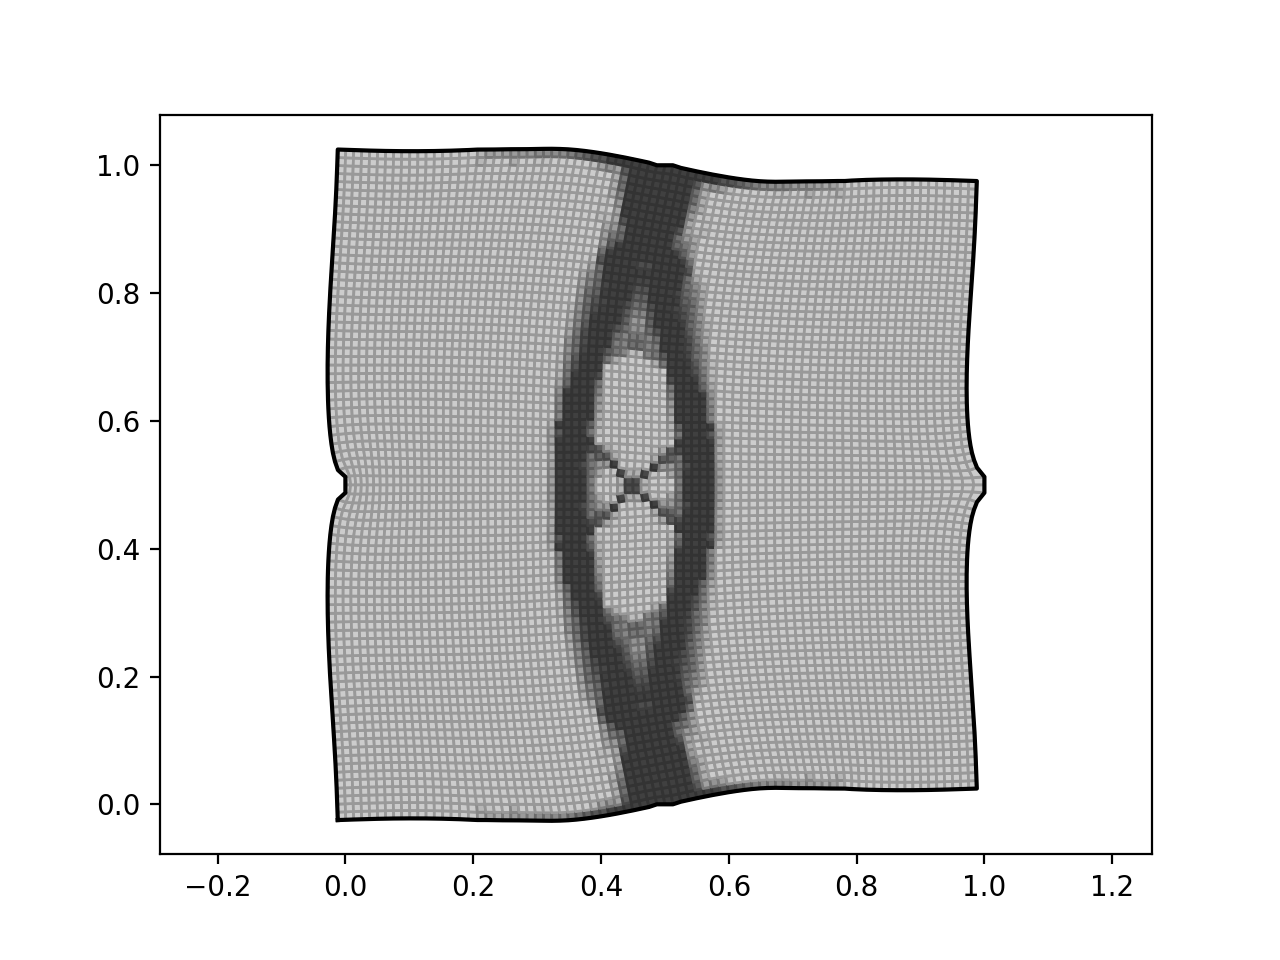

<IPython.core.display.Javascript object>


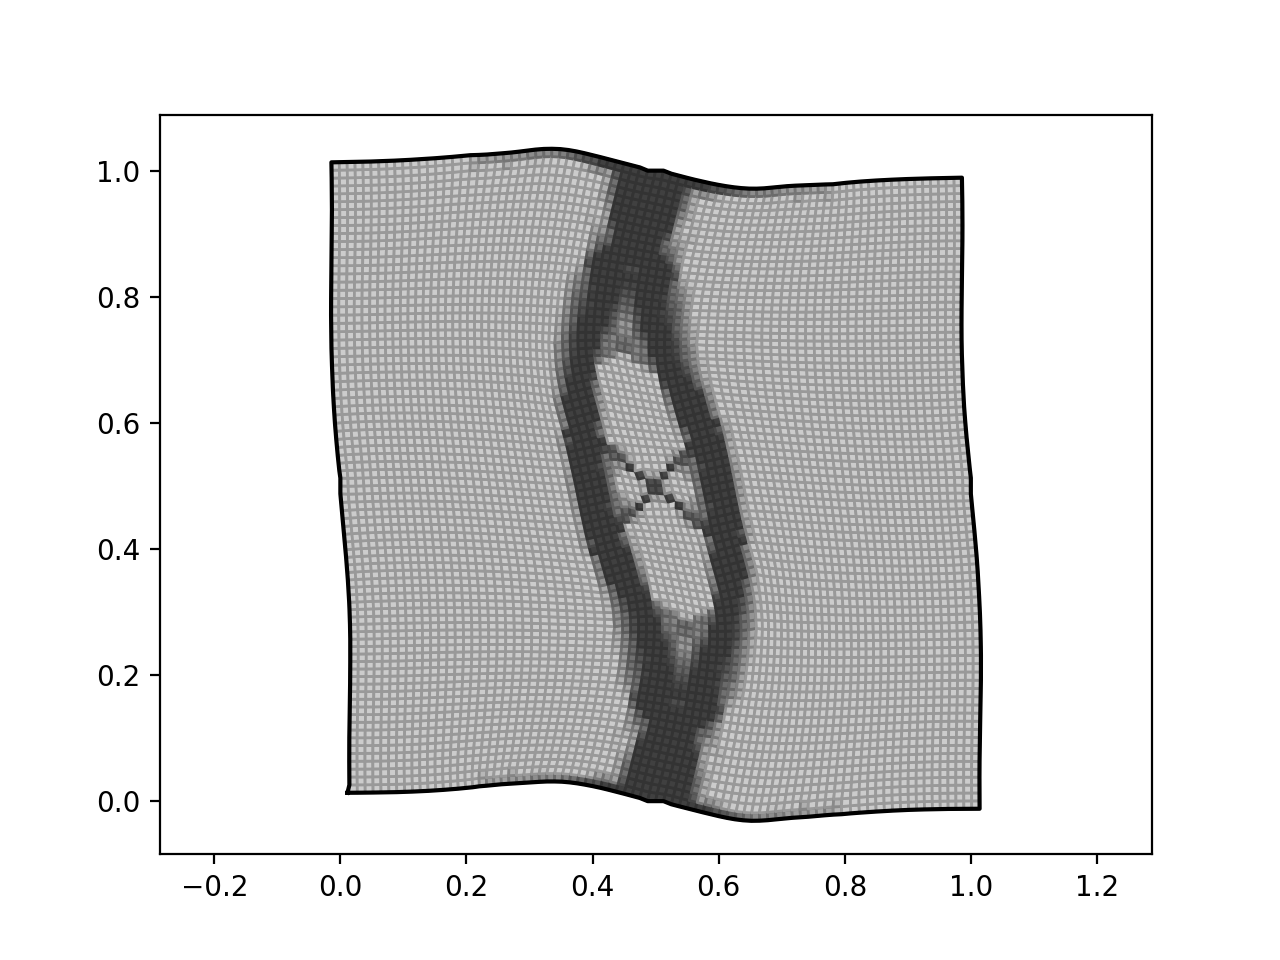

<IPython.core.display.Javascript object>


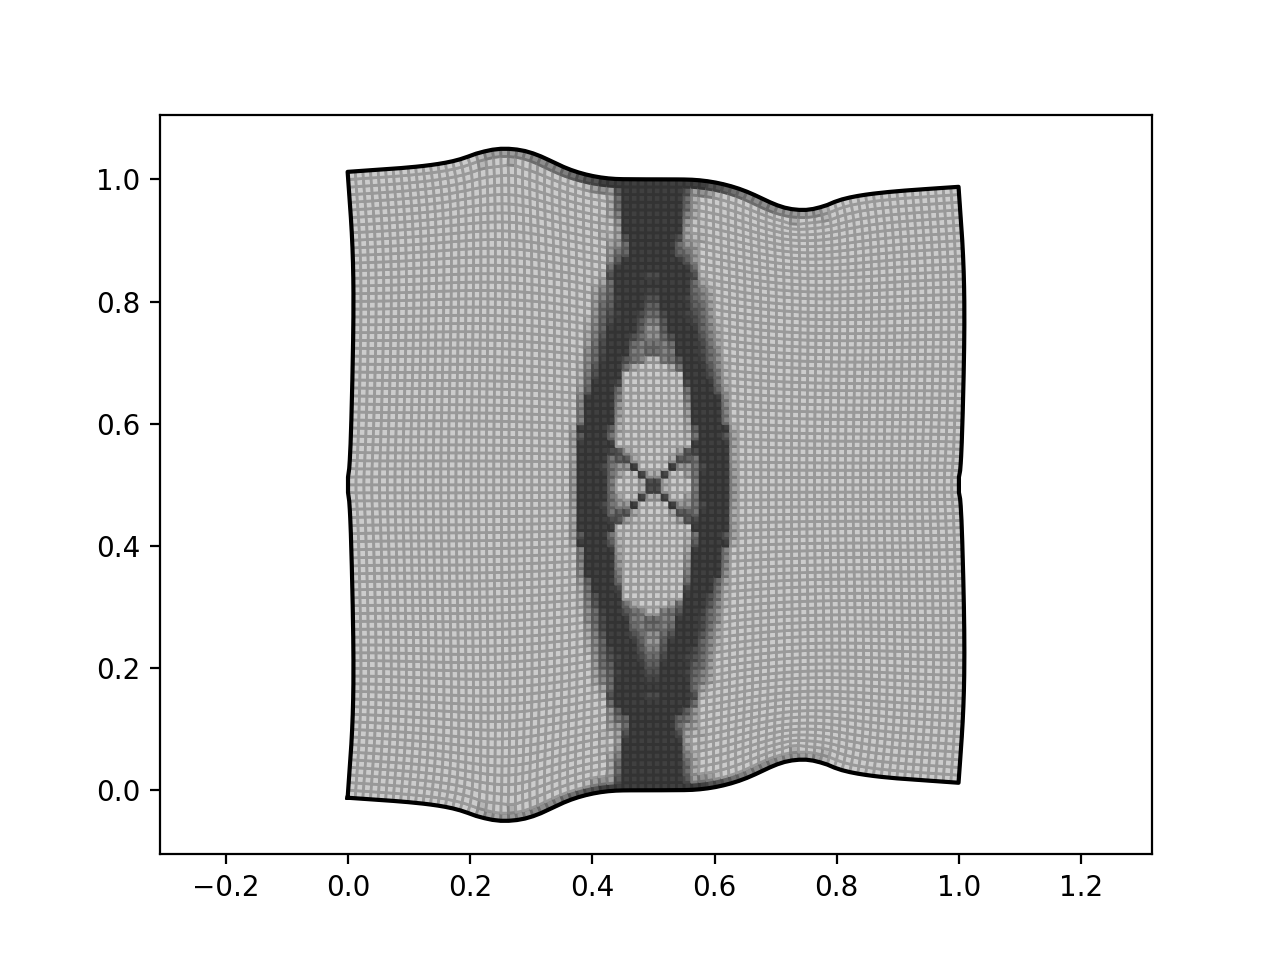

In [449]:
# Plot mode shapes
Lx = 1
Ly = Lx*(nely/nelx)
# Ly = 0.9
# nely = int(nelx*0.9)
eleOrder = 1
mesh1 = mesh2D.regularRectangle(nelx,nely,Lx,Ly,eleOrder)

# plot densities
plt.figure(24)
plt.clf()
plt.imshow(np.reshape(x1,(nely,nelx),order = 'F'))
plt.show()
plt.axis('equal')

plt.figure(25)
plt.clf()
plt.plot(np.asarray(info1['lamlist']))
plt.ylim((0,(np.round((1.5*10)*info1['lamlist'][-1][0])/10)))


Phis = info1['Philist'][-1]
for i in range(np.minimum(np.shape(Phis)[1],3)):
    plt.figure(20+i)
    plt.clf()
    meshNew = copy.deepcopy(mesh1)
    Phiplot = Phis[:,i]
    Phiplot = Phiplot/np.amax(np.abs(Phiplot))
    meshNew.updateCoordinates(meshNew.coordinates + 
        0.05*np.reshape(Phiplot,np.shape(meshNew.coordinates)))
    meshHandle = mesh2D.plotElements(meshNew,C=x1)
    edgeHandle = mesh2D.plotEdges(meshNew)
    plt.show()

In [ ]:
# Plot mode shapes
Lx = 3
Ly = 1
eleOrder = 1
mesh = mesh2D.regularRectangle(nelx,nely,Lx,Ly,eleOrder)

for i in range(np.shape(Phi2)[1]):
    plt.figure(5+i)
    plt.clf()
    meshNew = copy.deepcopy(mesh)
    Phiplot = info2['Philist'][-1][:,i]
    Phiplot = Phiplot/np.amax(np.abs(Phiplot))
    meshNew.updateCoordinates(meshNew.coordinates + 
        0.15*np.reshape(Phiplot,np.shape(meshNew.coordinates)))
    meshHandle = mesh2D.plotElements(meshNew,C=x2)
    edgeHandle = mesh2D.plotEdges(meshNew)
    plt.show()

In [163]:
## Dynamic Optimization: Direct Method
nely = 48
nelx = nely*3


volFrac = 0.3

maxiter = 100
iteration = 0
x3 = [-1]

penal = 4 #np.linspace(4,5,maxiter)
rmin = 0.04*nelx
rmin = 2
L = 1
Lx = 3*L
costFunc = 'eigval'

# power3, maxiter = 200, penal = 10

x3, info3 = topOptHarmonic.topo2D(nelx,nely,Lx,volFrac,penal,rmin,iteration,maxiter,x3,costFunc)

Phi3 = info3['Philist'][-1]

Model size:  14210  DOFs
It.:   1,    Obj.: 1.889e-04,   Vol.:0.3000, Ch.:0.0500,   Tloop:0.7656
It.:   2,    Obj.: 3.118e-04,   Vol.:0.3000, Ch.:0.0500,   Tloop:0.7238
It.:   3,    Obj.: 4.513e-04,   Vol.:0.3000, Ch.:0.0500,   Tloop:0.7234
It.:   4,    Obj.: 5.898e-04,   Vol.:0.3000, Ch.:0.0500,   Tloop:0.7204
It.:   5,    Obj.: 7.304e-04,   Vol.:0.3000, Ch.:0.0500,   Tloop:0.7127
It.:   6,    Obj.: 9.031e-04,   Vol.:0.3000, Ch.:0.0500,   Tloop:0.7116
It.:   7,    Obj.: 1.121e-03,   Vol.:0.3000, Ch.:0.0500,   Tloop:0.7627
It.:   8,    Obj.: 1.269e-03,   Vol.:0.3000, Ch.:0.0500,   Tloop:0.7387
It.:   9,    Obj.: 1.439e-03,   Vol.:0.3000, Ch.:0.0500,   Tloop:0.7828
It.:  10,    Obj.: 1.654e-03,   Vol.:0.3000, Ch.:0.0500,   Tloop:0.7915
It.:  11,    Obj.: 1.902e-03,   Vol.:0.3000, Ch.:0.0500,   Tloop:0.7895
It.:  12,    Obj.: 2.178e-03,   Vol.:0.3000, Ch.:0.0500,   Tloop:0.8041
It.:  13,    Obj.: 2.465e-03,   Vol.:0.3000, Ch.:0.0500,   Tloop:0.7772
It.:  14,    Obj.: 2.768e-03,   Vol.:0.

<IPython.core.display.Javascript object>


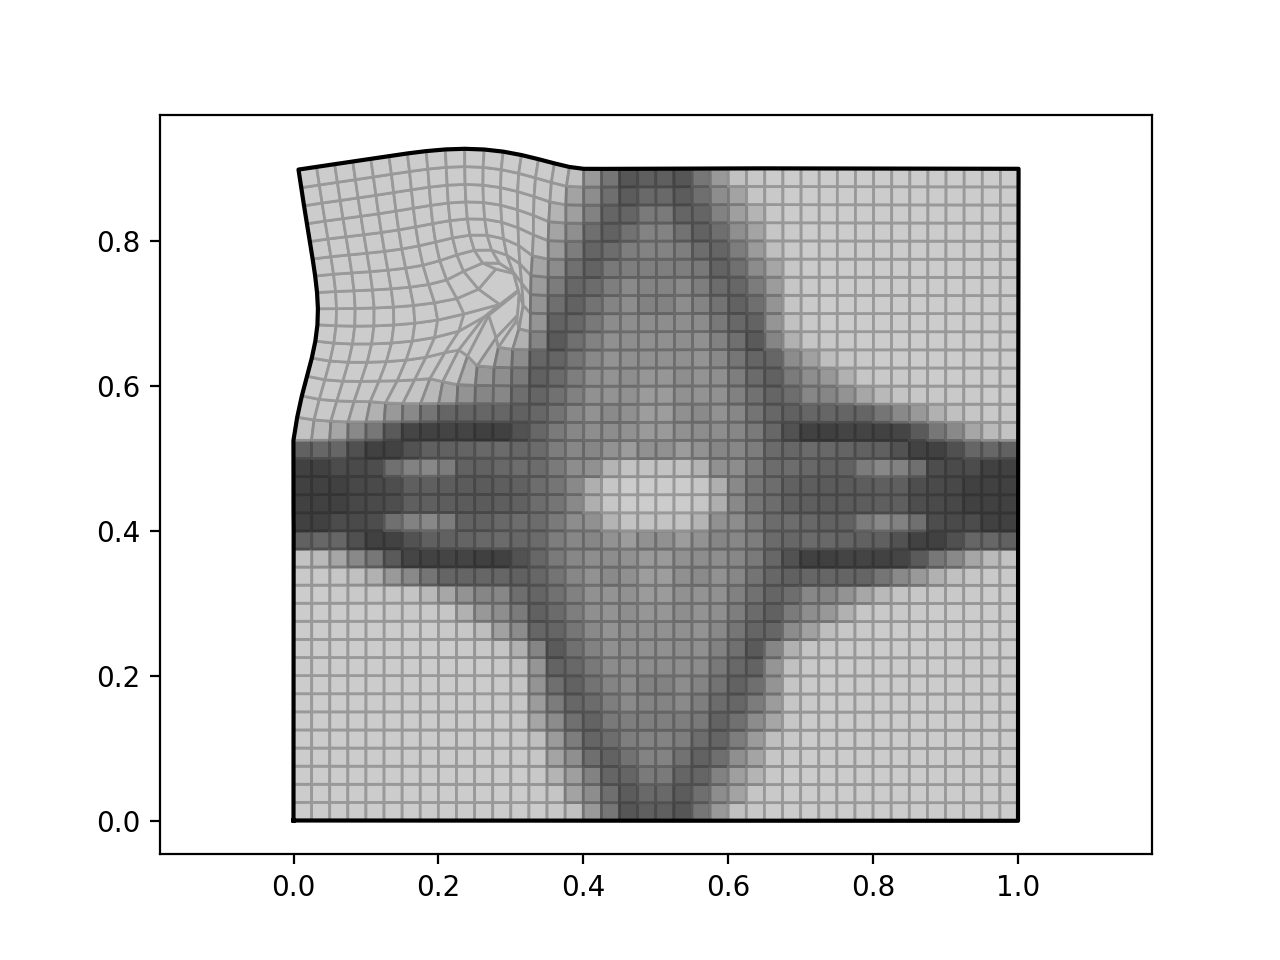

In [164]:
# plot design mode shapes
for i in range(np.shape(Phi3)[1]):
    plt.figure(10+i)
    plt.clf()
    meshNew = copy.deepcopy(mesh)
    Phiplot = Phi3[:,i]
    Phiplot = Phiplot/np.amax(np.abs(Phiplot))
    meshNew.updateCoordinates(meshNew.coordinates + 
        0.15*np.reshape(Phiplot,np.shape(meshNew.coordinates)))
    meshHandle = mesh2D.plotElements(meshNew,C=x3)
    edgeHandle = mesh2D.plotEdges(meshNew)
    plt.show()
    